<a href="https://colab.research.google.com/github/Harish842/Time-Series-Analysis/blob/main/Lab0_Date_Time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
date = pd.to_datetime("26th of April, 2023")
date

Timestamp('2023-04-26 00:00:00')

In [ ]:
date.strftime('%A')

'Wednesday'

In [ ]:
import numpy as np

In [ ]:
date + pd.to_timedelta(np.arange(12), 'D')

DatetimeIndex(['2023-04-26', '2023-04-27', '2023-04-28', '2023-04-29',
               '2023-04-30', '2023-05-01', '2023-05-02', '2023-05-03',
               '2023-05-04', '2023-05-05', '2023-05-06', '2023-05-07'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
index = pd.DatetimeIndex(['2014-07-04', '2014-08-04','2015-07-04', '2015-08-04'])
data = pd.Series([0, 1, 2, 3], index=index)
data

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
data['2014-07-04':'2015-07-04']

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64

In [ ]:
data['2015']

2015-07-04    2
2015-08-04    3
dtype: int64

In [ ]:
dates = pd.to_datetime(['2015-7-03','4th of July, 2015','2015-Jul-6', '07-07-2015', '20150708'])

In [ ]:
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [ ]:
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [ ]:
pd.date_range('2015-07-03', '2015-07-10')

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
pd.date_range('2015-07-03', periods=8)

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
data = pd.read_csv("https://github.com/springcoil/pandas_fu/raw/master/FremontBridge.csv",index_col='Date', parse_dates=True )

In [ ]:
data.head(3)

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0


In [ ]:
data.columns = ['West', 'East']
data['Total'] = data.eval('West + East')

In [ ]:
data.head(3)

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0


In [ ]:
data.dropna().describe()

,West,East,Total
count,26225.000000,26225.000000,26225.000000
mean,58.310658,53.605682,111.916339
std,75.671427,76.128342,137.383976
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,17.000000
50%,33.000000,28.000000,64.000000
75%,77.000000,67.000000,149.000000
max,781.000000,667.000000,1050.000000


In [ ]:

%matplotlib inline
import seaborn; seaborn.set()

Text(0, 0.5, 'Hourly Bicycle Count')

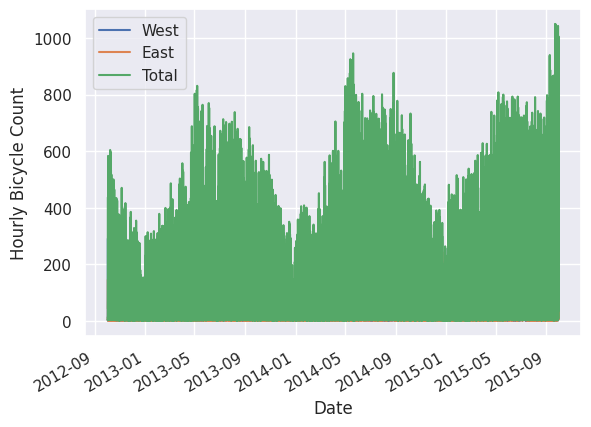

In [ ]:
import matplotlib.pyplot as plt
data.plot()
plt.ylabel('Hourly Bicycle Count')

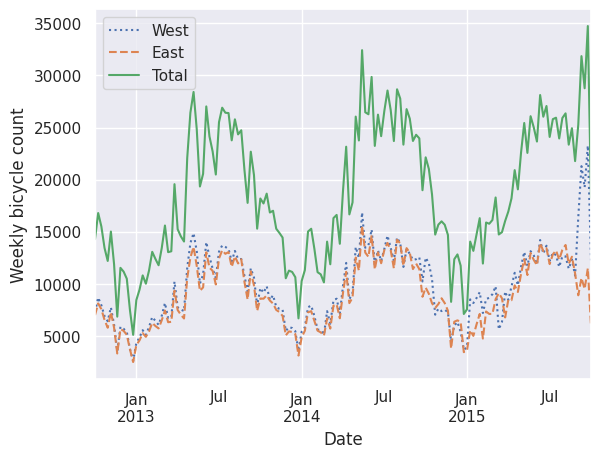

In [ ]:
weekly = data.resample('W').sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count');

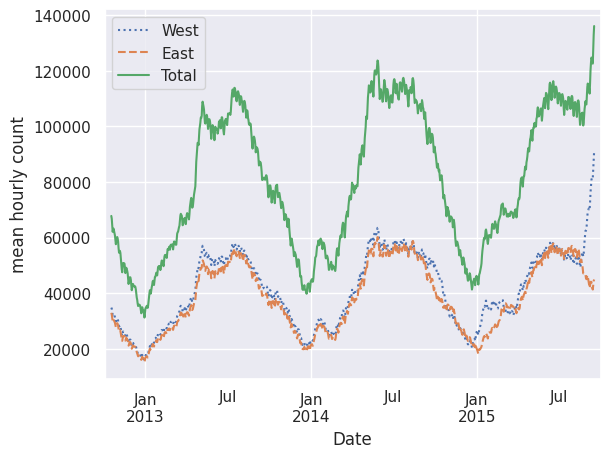

In [ ]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count');

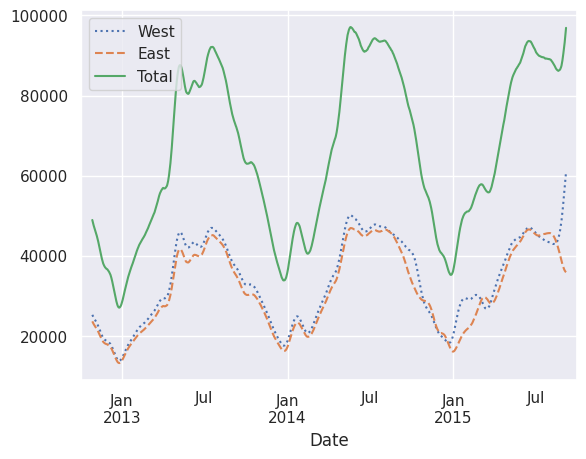

In [ ]:
daily.rolling(50, center=True,
win_type='gaussian').sum(std=10).plot(style=[':', '--', '-']);

In [ ]:
import numpy as np

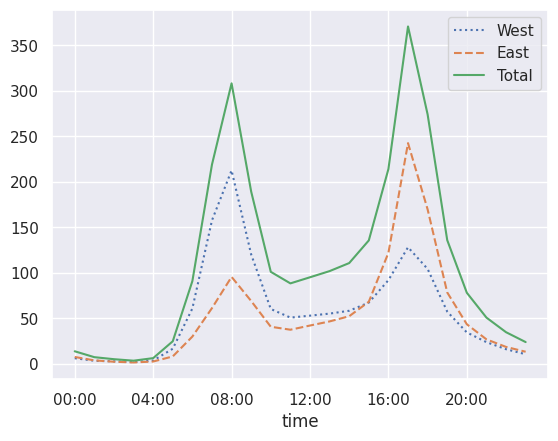

In [ ]:
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks=hourly_ticks, style=[':', '--', '-']);

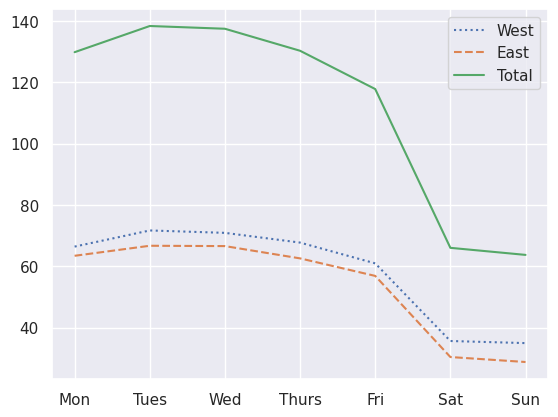

In [ ]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday.index = ['Mon', 'Tues', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-']);